<a href="https://colab.research.google.com/github/berthine/ML_projects_2023/blob/main/Malaria_Diagnosis_CNN_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Malaria Diagnosis
**Contact:** [Dr. Habiboulaye Amadou-Boubacar](https://www.linkedin.com/in/habiboulaye-amadou-boubacar-8b153710)  
This notebook is inspired by works of (Sivaramakrishnan Rajaraman  et al., 2018) and (Jason Brownlee, 2019). Acknowledge to NIH and Bangalor Hospital who make available this malaria dataset.

Malaria is an infectuous disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes.

The Malaria burden with some key figures:
<font color='red'>
* More than 219 million cases
* Over 430 000 deaths in 2017 (Mostly: children & pregnants)
* 80% in 15 countries of Africa & India
  </font>

![MalariaBurd](https://github.com/habiboulaye/ai-labs/blob/master/malaria-diagnosis/doc-images/MalariaBurden.png?raw=1)

The malaria diagnosis is performed using blood test:
* Collect patient blood smear 
* Microscopic visualisation of the parasit

![MalariaDiag](https://github.com/habiboulaye/ai-labs/blob/master/malaria-diagnosis/doc-images/MalariaDiag.png?raw=1)
  
Main issues related to traditional diagnosis: 
<font color='#ed7d31'>
* resource-constrained regions 
* time needed and delays
* diagnosis accuracy and cost
</font>

The objective of this notebook is to apply modern deep learning techniques to perform medical image analysis for malaria diagnosis.

*This notebook is inspired by works of (Sivaramakrishnan Rajaraman  et al., 2018), (Adrian Rosebrock, 2018) and (Jason Brownlee, 2019)*

## Data Science Training School
### ML Essentials Course
## **Group 6**:
* Jeremiah Ayock
* Berthine Nyunga
* Esaie Dufitimana
* Hirwa Pacifique

## Configuration

* **Useful infos**: *https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d*

In [ ]:
# #Mount the local drive project_forder
# from google.colab import drive
# drive.mount('/content/drive/')
# !ls "/content/drive/My Drive/Colab Notebooks/10xDS/Projects/malaria-diagnosis/"

In [ ]:
# Use GPU: Please check if the outpout is '/device:GPU:0'
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

2.12.0


'/device:GPU:0'

## Populating namespaces

In [ ]:
# Importing basic libraries
import os
import random
import shutil
from matplotlib import pyplot
from matplotlib.image import imread
%matplotlib inline

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
# Define the useful paths for data accessibility
ai_project = '.' "/content/drive/My Drive/Colab Notebooks/Training_school_ML_essentials"
cell_images_dir = os.path.join(ai_project,'cell_images')
training_path = os.path.join(ai_project,'train')
testing_path = os.path.join(ai_project,'test')

## Prepare DataSet

### *Download* DataSet

In [ ]:
# Download the data in the allocated google cloud-server. If already down, turn downloadData=False
downloadData = True
if downloadData == True:
  indrive = False
  if indrive == True:
    !wget https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip -P "/content/drive/My Drive/Colab Notebooks/Training_school_ML_essentials"
    !unzip "/content/drive/My Drive/Colab Notebooks/Training_school_ML_essentials/cell_images.zip" -d "/content/drive/My Drive/Colab Notebooks/Training_school_ML_essentials/"
    !ls "/content/drive/My Drive/Colab Notebooks/Training_school_ML_essentials"
  else: #incloud google server
    !rm -rf cell_images.*
    !wget https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip
    !unzip cell_images.zip >/dev/null 2>&1
    !ls 

--2023-04-12 09:53:20--  https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 13.227.254.42, 13.227.254.8, 13.227.254.11, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|13.227.254.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  79.8MB/s    in 4.3s    

2023-04-12 09:53:25 (79.3 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]

cell_images  cell_images.zip  sample_data


### Visualize cell images

13780 Uninfected images: view of 6 samples
(148, 142, 3)


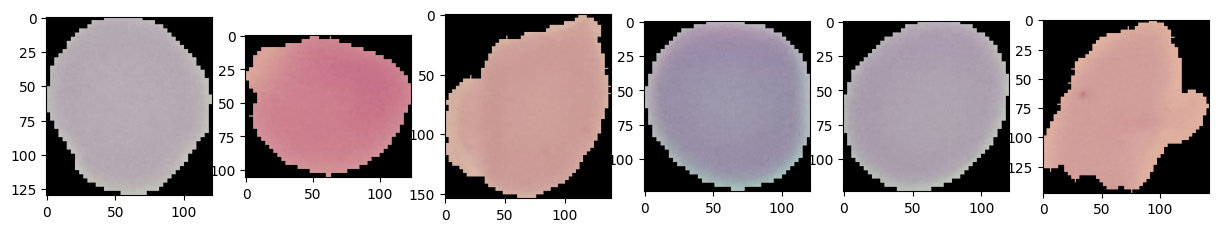

In [ ]:
# Visualize some samples (randomly selected) of blood smears from healthy patients 
N_samples = 6
uninfected_dir = os.path.join('/content/cell_images','Uninfected')
uninfected_samples = random.sample(os.listdir(uninfected_dir), N_samples)
pyplot.figure(figsize=(15,3))
print("{} Uninfected images: view of {} samples".format(len(os.listdir(uninfected_dir)), N_samples))
i = 0
while i < N_samples: # in random.sample(os.listdir(parasitized_dir), 6):
    pyplot.subplot(1,N_samples,1+i)
    img_uninfected = imread(os.path.join(uninfected_dir, uninfected_samples[i]))
    pyplot.imshow(img_uninfected)
    i+=1
print(img_uninfected.shape)

13780 Parasitized images: view of 6 samples
(133, 121, 3)


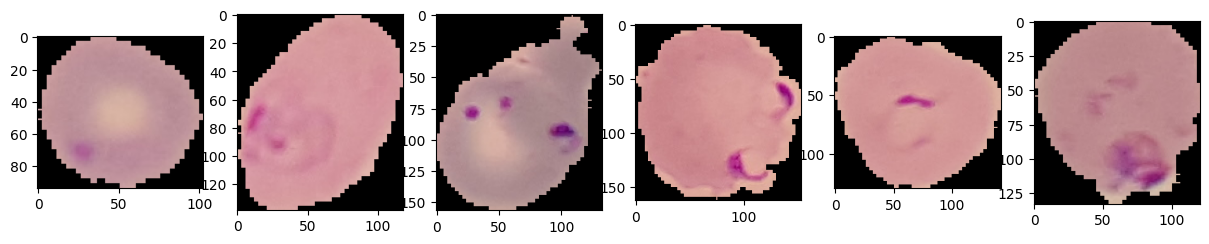

In [ ]:
# Visualize some samples (randomly selected) of blood smears from parasitized patients 
N_samples = 6
Parasitized_dir = os.path.join('/content/cell_images','Parasitized')
Parasitized_samples = random.sample(os.listdir(Parasitized_dir), N_samples)
pyplot.figure(figsize=(15,3))
print("{} Parasitized images: view of {} samples".format(len(os.listdir(Parasitized_dir)), N_samples))
i = 0
while i < N_samples: # in random.sample(os.listdir(parasitized_dir), 6):
    pyplot.subplot(1,N_samples,1+i)
    img_Parasitized = imread(os.path.join(Parasitized_dir, Parasitized_samples[i]))
    pyplot.imshow(img_Parasitized)
    i+=1
print(img_Parasitized.shape)

<font color='red'>
EXERCICE: Similarly, display some samples (randomly selected) of infected blood smears by replacing all <FILL_IN> with the correct codes
 </font>

13780 Parasitized images: view of 6 samples
(133, 121, 3)


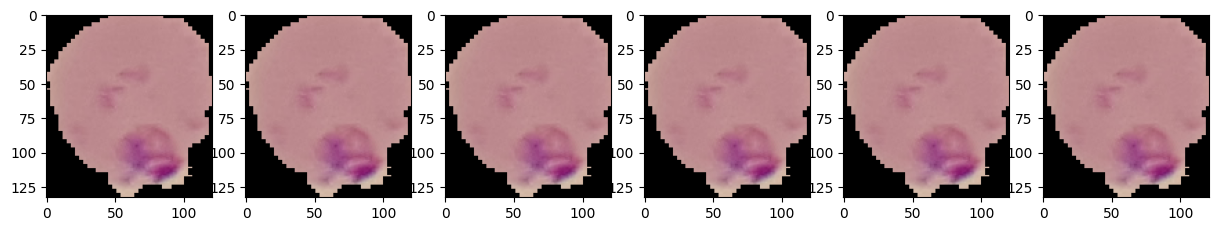

In [ ]:
# Visualize some samples (randomly selected) of blood smears from patients falciparum-infected 
print("{} Parasitized images: view of {} samples".format(len(os.listdir(uninfected_dir)), N_samples))
parasitized_dir = os.path.join('/content/cell_images','Parasitized')
parasitized_samples = random.sample(os.listdir(parasitized_dir), N_samples)
pyplot.figure(figsize=(15,3))
i = 0
while i < N_samples: # in random.sample(os.listdir(parasitized_dir), 6):
    pyplot.subplot(1,N_samples,1+i)
    #Not Implemented
    img_parasitized = imread(os.path.join(Parasitized_dir, Parasitized_samples[i])) #<FILL_IN>
    pyplot.imshow(img_Parasitized) #<FILL_IN>
    i+=1
print(img_parasitized.shape)

### Split train-test

In [ ]:
def create_train_test_data(class_name, train_split = 0.8):
    '''
      #Create a function create_train_test_data to split data into 
      #training and testing sets with respectives proportion 80%, 20%
      #--Train (@training_path)
          #--Parasitized
          #--Uninfected
      #--Test (@training_path)
          #--Parasitized
          #--Uninfected
      @class_name: 'Parasitized' or 'Uninfected'
      @train_split: eg. 80% train 20% test
    ''' 
    training_path = '/content/cell_images/training'
    testing_path = '/content/cell_images/testing'  
    train_class_path = os.path.join(training_path,class_name)  
    test_class_path = os.path.join(testing_path,class_name)

    class_img_names = [img for img in os.listdir(os.path.join('/content/cell_images', class_name))]
    random.seed(42)
    random.shuffle(class_img_names)

    # compute the training and testing split
    i = int(len(class_img_names) * train_split)
    train_class_img_names = class_img_names[:i]
    test_class_img_names = class_img_names[i:]

    def copy_imgs(learn_class_img_names, learn_class_path):
        if not os.path.exists(learn_class_path):
            os.makedirs(learn_class_path)
        for img in learn_class_img_names:
            p_orig = os.path.join('/content/cell_images',class_name,img) 
            p_dest = os.path.join(learn_class_path,img) 
            shutil.copy2(p_orig, p_dest)

    copy_imgs(train_class_img_names, train_class_path)
    copy_imgs(test_class_img_names, test_class_path)

SplitTrainTest = True
if SplitTrainTest == True:
    #Not Implemented
    if os.path.exists(training_path): shutil.rmtree(training_path)
    if os.path.exists(testing_path): shutil.rmtree(testing_path)
    # Create the training and testing subset for Parasitized class by using function create_train_test_data
    create_train_test_data('Parasitized', train_split = 0.8) #<FILL IN> 
    # Create the training and testing subset for Uninfected class by using function create_train_test_data
    create_train_test_data('Uninfected', train_split = 0.8)#<FILL IN> 
!ls /content/cell_images/training /content/cell_images/testing  # Check if training_path and testing_path folders with both classes are created
!ls /content/cell_images/training/Parasitized | wc -l

/content/cell_images/testing:
Parasitized  Uninfected

/content/cell_images/training:
Parasitized  Uninfected
11024


## Baseline CNN Model
Define a basic ConvNet defined with ConvLayer: Conv2D => MaxPooling2D followed by Flatten => Dense => Dense(output)

![ConvNet](https://github.com/habiboulaye/ai-labs/blob/master/malaria-diagnosis/doc-images/ConvNet.png?raw=1)


In [ ]:
#single convolutional layer with 32 filters followed by a max pooling layer.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BatchSize = 32
xy_shape = 64
n_epochs = 20

<font color='red'>
EXERCICE: Replace the <FILL_IN> with the correct codes to complete the 1-layer convolutional neural architecture
 </font>

In [ ]:
# define cnn model
def simple_cnn_model():
    model = Sequential()
    # 1 ConvLayer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(xy_shape, xy_shape, 3)))
    model.add(MaxPooling2D((2, 2)))
    # Flatten and Dense layers
    model.add(Flatten())
    # Add a Dense (Fully Connected) layer with 128 neurons with 'relu' activation with a kernel_initializer='he_uniform'
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))#<FILL_IN>
    # Add a Dense output layer with 1 neuron and activated by 'sigmoid'
    model.add(Dense(1, activation = 'sigmoid')) #<FILL_IN>
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Instanciate a data generator to fit the model
dataGen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
training_path = '/content/cell_images/training'
testing_path = '/content/cell_images/testing'
train_gen = dataGen.flow_from_directory(training_path,class_mode="binary",target_size=(xy_shape, xy_shape),
                                         batch_size=BatchSize)
test_gen = dataGen.flow_from_directory(testing_path,class_mode="binary",target_size=(xy_shape, xy_shape),
                                        batch_size=BatchSize)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
# Instanciate and train the model
conv_net1 = simple_cnn_model()
conv_net1_loss_acc_records = conv_net1.fit_generator(train_gen, steps_per_epoch=len(train_gen),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs, verbose=1, use_multiprocessing=True)#, workers=) #validation_freq=[1,2,5,10,15,20],

Epoch 1/20


<ipython-input-13-47f3cb63405b>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  conv_net1_loss_acc_records = conv_net1.fit_generator(train_gen, steps_per_epoch=len(train_gen),validation_data=test_gen, validation_steps=len(test_gen),


689/689 [==============================] - 57s 68ms/step - loss: 0.6583 - accuracy: 0.6704 - val_loss: 0.5328 - val_accuracy: 0.7293
Epoch 2/20
689/689 [==============================] - 46s 67ms/step - loss: 0.4552 - accuracy: 0.7923 - val_loss: 0.3779 - val_accuracy: 0.8385
Epoch 3/20
689/689 [==============================] - 45s 66ms/step - loss: 0.3034 - accuracy: 0.8795 - val_loss: 0.2907 - val_accuracy: 0.8821
Epoch 4/20
689/689 [==============================] - 50s 72ms/step - loss: 0.2176 - accuracy: 0.9166 - val_loss: 0.2858 - val_accuracy: 0.8745
Epoch 5/20
689/689 [==============================] - 46s 66ms/step - loss: 0.1713 - accuracy: 0.9357 - val_loss: 0.2745 - val_accuracy: 0.8982
Epoch 6/20
689/689 [==============================] - 47s 67ms/step - loss: 0.1417 - accuracy: 0.9470 - val_loss: 0.2694 - val_accuracy: 0.9040
Epoch 7/20
689/689 [==============================] - 45s 65ms/step - loss: 0.1140 - accuracy: 0.9583 - val_loss: 0.2765 - val_accuracy: 0.9078
Epo

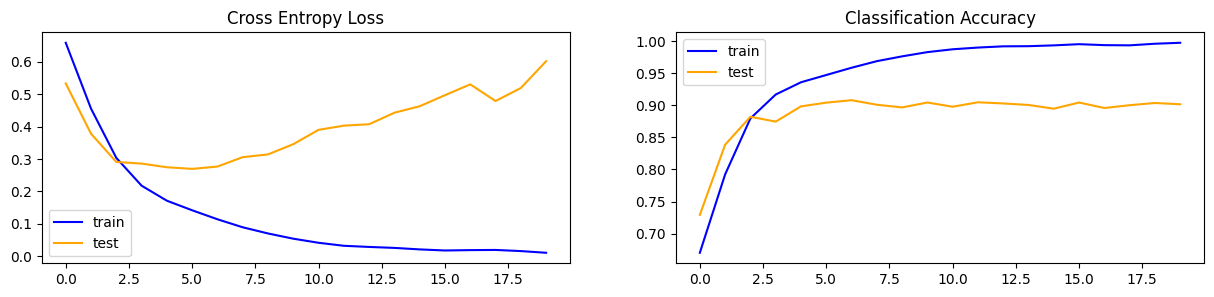

In [ ]:
# This function is defined to visualise loss and accuracy
def assess_performance(history):
    pyplot.figure(figsize=(15,3))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend()

assess_performance(conv_net1_loss_acc_records)

In [ ]:
# evaluate model
_, acc = conv_net1.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

<ipython-input-15-0577d5d1798f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = conv_net1.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)


> 90.149


### Data Augmentation

<font color='red'>
EXERCICE: Replace the <FILL_IN> with the correct codes to generate new augmented data
 </font>

In [ ]:
# Use data augmentation techniques to generate more variational data and improve the performance
# data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
# Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.
# the training dataset will be augmented with small (10%) random horizontal and vertical shifts and random horizontal flips that create a mirror image of a photo. Photos in both the train and test steps will have their pixel values scaled in the same way.

trainAug = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest")
# Keep
# dataGen = ImageDataGenerator(rescale=1.0/255.0)

# Generate the new training data using augmentation and testing data 
train_aug = trainAug.flow_from_directory(training_path,class_mode="binary",target_size=(xy_shape, xy_shape),
                                         batch_size=BatchSize)
test_gen = dataGen.flow_from_directory(testing_path,class_mode="binary",target_size=(xy_shape, xy_shape),
                                        batch_size=BatchSize)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
# Train the model with augmented data and assess the performance
conv_net1_aug = simple_cnn_model()
conv_net1_aug_loss_acc_records = conv_net1_aug.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs, verbose=1, use_multiprocessing=True, workers=2) #validation_freq=[1,2,5,10,15,20],

Epoch 1/20


<ipython-input-17-6ad9c919bfb4>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  conv_net1_aug_loss_acc_records = conv_net1_aug.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen),


689/689 [==============================] - 56s 78ms/step - loss: 0.6813 - accuracy: 0.6325 - val_loss: 0.5899 - val_accuracy: 0.6912
Epoch 2/20
689/689 [==============================] - 54s 78ms/step - loss: 0.5852 - accuracy: 0.6979 - val_loss: 0.5483 - val_accuracy: 0.7451
Epoch 3/20
689/689 [==============================] - 54s 78ms/step - loss: 0.5206 - accuracy: 0.7511 - val_loss: 0.4717 - val_accuracy: 0.7997
Epoch 4/20
689/689 [==============================] - 54s 78ms/step - loss: 0.4258 - accuracy: 0.8138 - val_loss: 0.4018 - val_accuracy: 0.8296
Epoch 5/20
689/689 [==============================] - 54s 79ms/step - loss: 0.3400 - accuracy: 0.8605 - val_loss: 0.3575 - val_accuracy: 0.8634
Epoch 6/20
689/689 [==============================] - 54s 79ms/step - loss: 0.2959 - accuracy: 0.8812 - val_loss: 0.3834 - val_accuracy: 0.8598
Epoch 7/20
689/689 [==============================] - 55s 79ms/step - loss: 0.2638 - accuracy: 0.8968 - val_loss: 0.2419 - val_accuracy: 0.9028
Epo

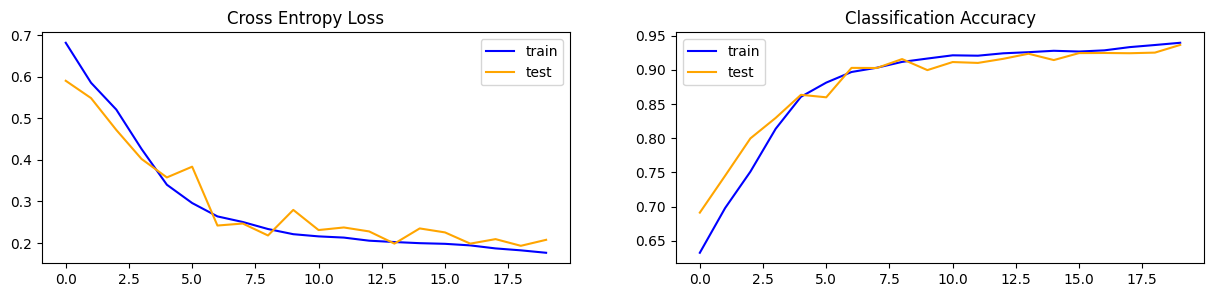

In [ ]:
# Plot loss and accurate and conclude
assess_performance(conv_net1_aug_loss_acc_records)

In [ ]:
# evaluate model
_, acc = conv_net1_aug.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

<ipython-input-19-c7faa93d7086>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = conv_net1_aug.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)


> 93.632


## 2-ConvLayers CNN

<font color='red'>
EXERCICE: Create a CNN with 2 ConvLayers by replacing all the <FILL_IN> with the correct codes
 </font>

In [ ]:
def cnn_model():
    '''
      Create the 2 layers ConvNet: FirstConvLayer > FirstConvLayer > Flatten > Dense > Dense(output)
    '''
    # Not Implemmented
    model = Sequential()
    # First ConvLayer: use-ing 32 3x3-filters, 'relu' activation function, kernel_initializer='he_uniform', padding='same' with the correct input shape
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same', input_shape=(xy_shape, xy_shape, 3)))#Conv2D with above listed parameters
    model.add(MaxPooling2D((2, 2))) #MaxPooling2D with shape 2x2
    # Second ConvLayer: use-ing 32 3x3-filters, 'relu' activation function
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same')) #Conv2D with above listed parameters
    model.add(MaxPooling2D((2, 2))) #MaxPooling2D with shape 2x2
    # Flatten followed by Dense and sigmoid Ouput Layers
    model.add(Flatten()) # Flatten
    model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))# Dense with 128 neurones, activation='relu', kernel_initializer='he_uniform'
    model.add(Dense(1, activation = 'sigmoid')) # Dense with 1 neuron activate by 'sigmoid' function
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
conv_net2_aug = cnn_model()
conv_net2_aug_loss_acc_records = conv_net2_aug.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs, verbose=1, use_multiprocessing=True, workers=2) #validation_freq=[1,2,5,10,15,20],

Epoch 1/20


<ipython-input-21-a3368a5272f2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  conv_net2_aug_loss_acc_records = conv_net2_aug.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen),


689/689 [==============================] - 56s 78ms/step - loss: 0.6021 - accuracy: 0.6818 - val_loss: 0.3558 - val_accuracy: 0.8434
Epoch 2/20
689/689 [==============================] - 54s 79ms/step - loss: 0.2689 - accuracy: 0.8981 - val_loss: 0.1953 - val_accuracy: 0.9249
Epoch 3/20
689/689 [==============================] - 55s 79ms/step - loss: 0.2047 - accuracy: 0.9286 - val_loss: 0.1996 - val_accuracy: 0.9240
Epoch 4/20
689/689 [==============================] - 54s 79ms/step - loss: 0.1866 - accuracy: 0.9372 - val_loss: 0.1563 - val_accuracy: 0.9496
Epoch 5/20
689/689 [==============================] - 54s 78ms/step - loss: 0.1717 - accuracy: 0.9433 - val_loss: 0.1610 - val_accuracy: 0.9425
Epoch 6/20
689/689 [==============================] - 54s 78ms/step - loss: 0.1629 - accuracy: 0.9487 - val_loss: 0.1364 - val_accuracy: 0.9603
Epoch 7/20
689/689 [==============================] - 53s 77ms/step - loss: 0.1508 - accuracy: 0.9514 - val_loss: 0.1286 - val_accuracy: 0.9594
Epo

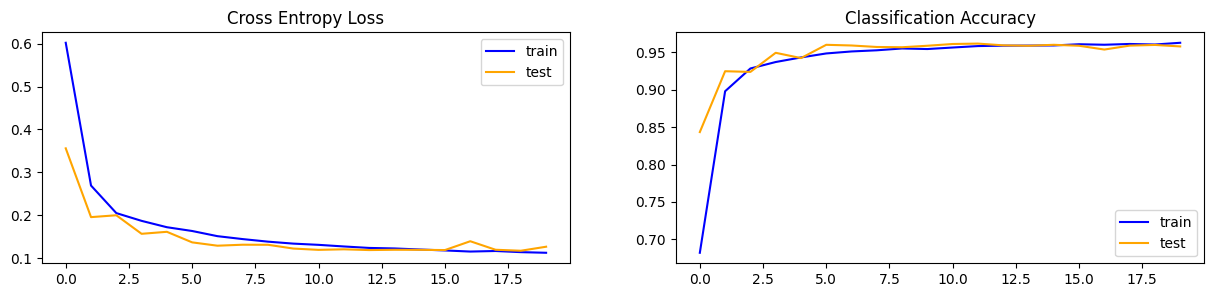

In [ ]:
assess_performance(conv_net2_aug_loss_acc_records)

In [ ]:
# evaluate model
_, acc = conv_net2_aug.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

<ipython-input-23-24fe779a1018>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = conv_net2_aug.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)


> 95.809


## Prediction: Automatic AI-based malaria diagnosis

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
# load and prepare the image
def load_image(filename, xy_shape=xy_shape):
    # load the image
    img = load_img(filename, target_size=(xy_shape, xy_shape))
    pyplot.imshow(img)
    # convert to array
    img = img_to_array(img)
    #print(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, xy_shape, xy_shape, 3)
    # center pixel data
    img = img.astype('float32')/255
    #img = img - [123.68, 116.779, 103.939]
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 166ms/step
Prediction: 80.28% => Uninfected


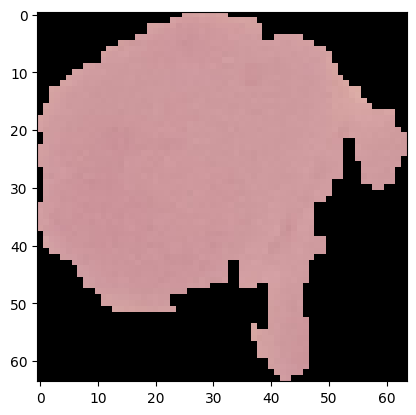

In [ ]:
# !cp '/content/drive/MyDrive/Colab Notebooks/Training_school_ML_essentials/physician_questions/patient_1.png'

# !wget https://github.com/habiboulaye/ai-labs/blob/master/malaria-diagnosis/physician_questions/patient_1.png
p_ask_image = '/content/drive/MyDrive/Colab Notebooks/Training_school_ML_essentials/physician_questions/patient_1.png' #os.path.join('physician_questions', 'patient_4.png')
# pyplot.imshow(p_ask_image)
image = load_image(p_ask_image)
pred_prod = conv_net2_aug.predict(image)[0][0]
print('Prediction: {:.2%} => {}'.format(pred_prod, 'Uninfected' if pred_prod > 0.5 else 'Parasitized'))

1/1 [==============================] - 0s 20ms/step
Prediction: 0.00% => Parasitized


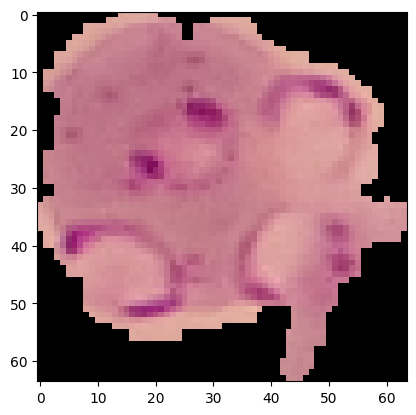

In [ ]:
# !cp '/content/drive/MyDrive/Colab Notebooks/Training_school_ML_essentials/physician_questions/patient_1.png'

# !wget https://github.com/habiboulaye/ai-labs/blob/master/malaria-diagnosis/physician_questions/patient_1.png
p_ask_image = '/content/drive/MyDrive/Colab Notebooks/Training_school_ML_essentials/physician_questions/patient_2.png' #os.path.join('physician_questions', 'patient_4.png')
# pyplot.imshow(p_ask_image)
image = load_image(p_ask_image)
pred_prod = conv_net2_aug.predict(image)[0][0]
print('Prediction: {:.2%} => {}'.format(pred_prod, 'Uninfected' if pred_prod > 0.5 else 'Parasitized'))

## Transfer Learning

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# define cnn model
xy_shape3 = 224
BatchSize3 = 64
##using VGG16
def deep_cnn_transfer_model():
    model = VGG16(include_top=False, input_shape=(xy_shape3, xy_shape3, 3))
    # mark loaded layers as not trainable
    nb_layers = len(model.layers)
    print('nb_layers:',nb_layers)
    for layer in model.layers: #[:nb_layers-5]:  #model.layers[1:20]
        layer.trainable=False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
conv_deep_transfer = deep_cnn_transfer_model()
conv_deep_transfer.summary()

58889256/58889256 [==============================] - 0s 0us/step
nb_layers: 19
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                

In [ ]:
train_aug = trainAug.flow_from_directory(training_path,class_mode="binary",target_size=(xy_shape3, xy_shape3),
                                         batch_size=BatchSize3)
test_gen = dataGen.flow_from_directory(testing_path,class_mode="binary",target_size=(xy_shape3, xy_shape3),
                                        batch_size=BatchSize3)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
conv_deep_transfer_loss_acc_records = conv_deep_transfer.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs, verbose=1, use_multiprocessing=True, workers=2) #validation_freq=[1,2,5,10,15,20],

<ipython-input-31-1c167c60837a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  conv_deep_transfer_loss_acc_records = conv_deep_transfer.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen),


Epoch 1/20
345/345 [==============================] - 324s 903ms/step - loss: 0.3517 - accuracy: 0.8573 - val_loss: 0.2170 - val_accuracy: 0.9233
Epoch 2/20
345/345 [==============================] - 308s 889ms/step - loss: 0.2195 - accuracy: 0.9126 - val_loss: 0.1824 - val_accuracy: 0.9298
Epoch 3/20
345/345 [==============================] - 324s 934ms/step - loss: 0.2026 - accuracy: 0.9204 - val_loss: 0.1696 - val_accuracy: 0.9365
Epoch 4/20
345/345 [==============================] - 316s 908ms/step - loss: 0.1914 - accuracy: 0.9277 - val_loss: 0.2079 - val_accuracy: 0.9229
Epoch 5/20
345/345 [==============================] - 329s 948ms/step - loss: 0.1924 - accuracy: 0.9254 - val_loss: 0.2114 - val_accuracy: 0.9178
Epoch 6/20
345/345 [==============================] - 308s 884ms/step - loss: 0.1916 - accuracy: 0.9259 - val_loss: 0.1771 - val_accuracy: 0.9329
Epoch 7/20
345/345 [==============================] - 327s 941ms/step - loss: 0.1717 - accuracy: 0.9349 - val_loss: 0.1624 -

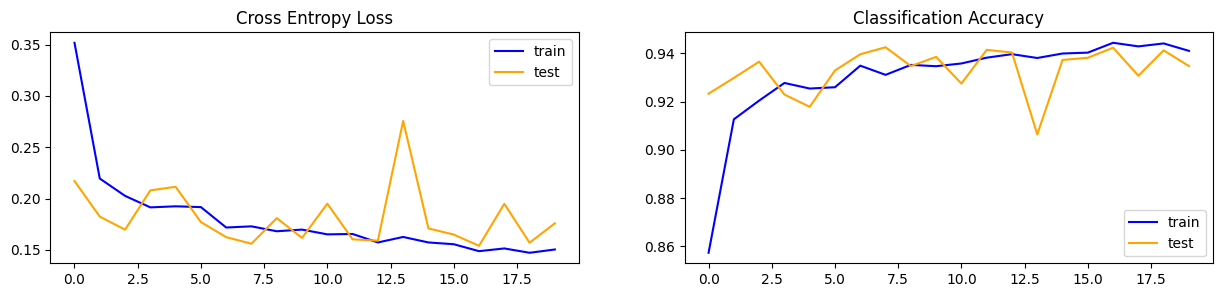

In [ ]:
assess_performance(conv_deep_transfer_loss_acc_records)

In [ ]:

# evaluate model
_, acc = conv_deep_transfer.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

<ipython-input-33-0189ed3f37d3>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = conv_deep_transfer.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)


> 93.469


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# define cnn model
xy_shape3 = 224
BatchSize3 = 64
##using ResNet50
def deep_cnn_transfer_model_resnet():
    model = ResNet50(include_top=False, input_shape=(xy_shape3, xy_shape3, 3))
    # mark loaded layers as not trainable
    nb_layers = len(model.layers)
    print('nb_layers:',nb_layers)
    for layer in model.layers: #[:nb_layers-5]:  #model.layers[1:20]
        layer.trainable=False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
conv_deep_transfer_resnet = deep_cnn_transfer_model_resnet()
conv_deep_transfer_resnet.summary()

94765736/94765736 [==============================] - 5s 0us/step
nb_layers: 175
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
              

In [ ]:
train_aug = trainAug.flow_from_directory(training_path,class_mode="binary",target_size=(xy_shape3, xy_shape3),
                                         batch_size=BatchSize3)
test_gen = dataGen.flow_from_directory(testing_path,class_mode="binary",target_size=(xy_shape3, xy_shape3),
                                        batch_size=BatchSize3)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [ ]:
conv_deep_transfer_loss_acc_records_resnet = conv_deep_transfer_resnet.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs, verbose=1, use_multiprocessing=True, workers=2) #validation_freq=[1,2,5,10,15,20],

<ipython-input-17-0eb9a6b1f0f6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  conv_deep_transfer_loss_acc_records_resnet = conv_deep_transfer_resnet.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen),


Epoch 1/20
345/345 [==============================] - 323s 884ms/step - loss: 0.8064 - accuracy: 0.5985 - val_loss: 0.5833 - val_accuracy: 0.6932
Epoch 2/20
345/345 [==============================] - 317s 913ms/step - loss: 0.6408 - accuracy: 0.6459 - val_loss: 0.6641 - val_accuracy: 0.6147
Epoch 3/20
345/345 [==============================] - 324s 931ms/step - loss: 0.6155 - accuracy: 0.6657 - val_loss: 0.5753 - val_accuracy: 0.7032
Epoch 4/20
345/345 [==============================] - 321s 921ms/step - loss: 0.6087 - accuracy: 0.6724 - val_loss: 0.6049 - val_accuracy: 0.6602
Epoch 5/20
345/345 [==============================] - 317s 915ms/step - loss: 0.5812 - accuracy: 0.6930 - val_loss: 0.6175 - val_accuracy: 0.6529
Epoch 6/20
345/345 [==============================] - 316s 911ms/step - loss: 0.5805 - accuracy: 0.6941 - val_loss: 0.5500 - val_accuracy: 0.7130
Epoch 7/20
345/345 [==============================] - 317s 915ms/step - loss: 0.5646 - accuracy: 0.7087 - val_loss: 0.5827 -

In [ ]:
def assess_performance(history):
    pyplot.figure(figsize=(15,3))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend()

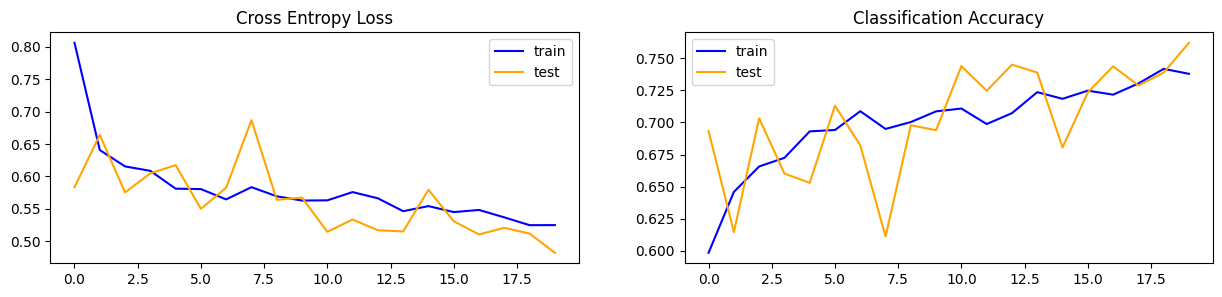

In [ ]:
assess_performance(conv_deep_transfer_loss_acc_records_resnet)

In [ ]:
# evaluate model
_, acc = conv_deep_transfer_resnet.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

<ipython-input-21-ca1f613b97d7>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = conv_deep_transfer_resnet.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)


> 76.197


In [ ]:
#Hypeparameter tuning (batcsize = 256, optimizer=adam, epoch=20, neurons=256)
from keras.optimizers import SGD, Adam
xy_shape3 = 224
BatchSize3 = 256
##using ResNet50
def deep_cnn_transfer_model_resnet2():
    model = ResNet50(include_top=False, input_shape=(xy_shape3, xy_shape3, 3))
    # mark loaded layers as not trainable
    nb_layers = len(model.layers)
    print('nb_layers:',nb_layers)
    for layer in model.layers: #[:nb_layers-5]:  #model.layers[1:20]
        layer.trainable=False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
conv_deep_transfer_resnet2 = deep_cnn_transfer_model_resnet2()
# conv_deep_transfer_resnet2.summary()

nb_layers: 175


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
conv_deep_transfer_loss_acc_records_resnet2 = conv_deep_transfer_resnet2.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs, verbose=1, use_multiprocessing=True, workers=2) #validation_freq=[1,2,5,10,15,20],

In [ ]:
assess_performance(conv_deep_transfer_loss_acc_records_resnet2)

In [ ]:
# evaluate model
_, acc = conv_deep_transfer_resnet2.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

In [ ]:
## hypeparameter_turning

from tensorflow.keras.optimizers import RMSprop
def cnn_model_tuning():
    '''
      Create the 2 layers ConvNet: FirstConvLayer > FirstConvLayer > Flatten > Dense > Dense(output)
    '''
    # Not Implemmented
    model = Sequential()
    # First ConvLayer: use-ing 32 3x3-filters, 'relu' activation function, kernel_initializer='he_uniform', padding='same' with the correct input shape
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same', input_shape=(xy_shape, xy_shape, 3)))#Conv2D with above listed parameters
    model.add(MaxPooling2D((2, 2))) #MaxPooling2D with shape 2x2
    # Second ConvLayer: use-ing 32 3x3-filters, 'relu' activation function
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same')) #Conv2D with above listed parameters
    model.add(MaxPooling2D((2, 2))) #MaxPooling2D with shape 2x2
    # Flatten followed by Dense and sigmoid Ouput Layers
    model.add(Flatten()) # Flatten
    model.add(Dense(256, activation = 'relu', kernel_initializer='he_uniform'))# Dense with 128 neurones, activation='relu', kernel_initializer='he_uniform'
    model.add(Dense(1, activation = 'sigmoid')) # Dense with 1 neuron activate by 'sigmoid' function
    # compile model
    learning_rate = 0.01  # set the learning rate
    optimizer = RMSprop(learning_rate=learning_rate) 
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
BatchSize_new = 128
xy_shape = 64
n_epochs_new = 30

In [ ]:
conv_net3_aug = cnn_model_tuning()
conv_net3_aug_loss_acc_records = conv_net3_aug.fit_generator(train_aug, steps_per_epoch=len(train_aug),validation_data=test_gen, validation_steps=len(test_gen), 
                              epochs=n_epochs_new, verbose=1, use_multiprocessing=True, workers=2)



In [ ]:
assess_performance(conv_net3_aug_loss_acc_records)

In [ ]:
# evaluate model
_, acc = conv_net3_aug.evaluate_generator(test_gen, steps=len(test_gen), use_multiprocessing=True, verbose=0)
print('> %.3f' % (acc * 100.0))

## Compare performance results

After training the different models, following are the performance results (in term of accuracy) during testing.

*   conv_net1: 90.149%

*   conv_net1_aug: 93.63%

*   conv_net2_aug:95.81%

*   conv_deep_transfer: 
** VGG16: 93.47%
** ResNet50: 76.20%

***Conclusion:*** The CNN with 2 ConvLayers performed better with an accuracy of 95% compared to others. Using pre-trained models did not improve the accuracy. When comparing the pre-trained models used for this task, VGG16 performed better than ResNet. Even after fine-tuning ResNet50 by increasing the batch size and number of neurons, the results were still lower compared to the other models.

## Assignment: Work to improve the performance - try different strategies:
* Hyperparameters tuning
* Test other models
  - eg. ResNet, VGG